# Final Exam 
#### Honors Data Science and Statistics - HNRS: 2920
#### Professor Chan

## Name:  Artem Koval

In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

**Note:** that your personal opinion is not to be included in this assignment. You are to report only what your statistical analysis finds and what your research findings are. You are allowed to include your personal opinion briefly in the conclusion section as outlined below. 

### Introduction

The data below is taken from the SLC airport weather station starting in 1949. For each year the number of observations N is recorded. From these observation the average minimum temperature tmin is recorded and the average maximum temperature is recorded.

In [2]:
data = Table.read_table('SLCyearly.csv')
data.show(5)

Year,N,tmin,tmax,tavg,Date,decade
1949,365,37.937,62.3151,nan,1/1/1949,4
1950,365,39.5918,63.6548,nan,1/1/1950,5
1951,365,38.6356,62.0795,nan,1/1/1951,5
1952,366,39.4262,62.6831,nan,1/1/1952,5
1953,365,41.3096,65.1863,nan,1/1/1953,5


***Question 1:*** Research at least two causes of climate change and at least one possible solution to climate change. Summarize what you find and cite your sources. These sources will need to be a credible newspaper, research article, or book. You are required to write at least two paragraphs. 

***Answer:***
    
    Two causes of climat change I researched are greenhouse gas emmisions and conversion of land for forestry and agriculture. The primary source of human-generated emissions is the burning of fossil fuels like coal, oil, and gas for electricity, heat, and transportation. We have increased the levels of greenhouse gases to levels unprecedented in at least the last 800,000 years. It is definitely more than ecosystem of our planet can handle, especially of how recent and artificial this emmisions are.
    
    The conversion of land for forestry, agriculture, and cities is also human caused. The best example of it is the cultivation of forests for our needs - as the planet has less "green" land, less greenhouse gases are being absobed by our ecosysyem through photosynthesis. Additionally, since the beginning of the Industrial Revolution, we have dramatically increased the consumption of wood and natural resources like coal and oil.
    
***Sources:*** 

https://www.canada.ca/en/environment-climate-change/services/climate-change/causes.html


https://www.nrdc.org/stories/global-climate-change-what-you-need-know

***Question 2:*** Explain how climate change impacts society and the environment. Provide at least two citations and write are least two paragraphs.

***Answer:*** 
   
    First of all, the invironment. Climat change disrupts weather and season cycles. Winters are becoming warmer, while summers are becoming hotter. Sea level rises, as well as oceans become more acidic and warmer. Air becomes more pollute across the world. Many different ecosystems are being affected, which leads to extinction of many anymal and plant kinds. 

    This all directly negatively affects us humans. Pollute air and more hostile environments direvtly lead to the human health issues. Some of the highly populated urban areas are so pollute, that the pollution becomes a national emergency. The potential long term effects on humans are even more inpactful - we might reach a point of no return within years - it would mean that the negative changes that humans made on the planet would become irreversable. 
    
***Sources:*** 

https://www.canada.ca/en/environment-climate-change/services/climate-change/causes.html


https://www.nrdc.org/stories/global-climate-change-what-you-need-know

**Question 3:** Is this an observational data set or a completely ranomized designed experiment? Explain why or why not?

***Answer:***

    Sadly, we cannot have a randomized designed experiment in this case. If we did, we would need a lot of different cities, assign them randomly to different factors, and tests over time how certain things affect the environment in those cities. And, obviously, we do not have an ability to test it, and it would be unethical to do, but we can observe data we have and draw the conclusions from the dataset.

**Question 4:** What types of conclusions can be drawn from this data set? Explain your reasoning

**Answer:**
    
    What we can test, is if there is any pattern in how the temperature is changing over time. In particular, we can see how the average minimum and the average maximum temperature per year is changing over time, and if there is any pattern after all.

# Data analysis and exploration: average minimum and maximum temperature

***Question 5:*** Make a scatter diagram of average minimum temperature versus year

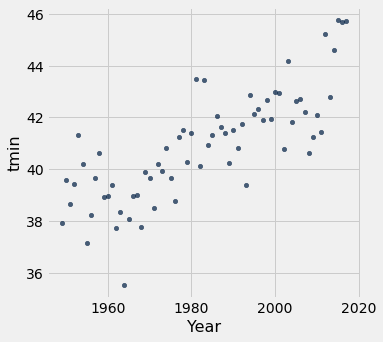

In [3]:
#Answer
data.scatter('Year', 'tmin')

**Question 6:** Calculate the correlation coefficient between average minimum temperature and year. You may need to add additionl lines of code to define the correlation function.

In [4]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

correlation(data,'Year', 'tmin')

0.7899052562728391

***Question 7:*** Explain the meaning of the correlation coefficient in the context of the data. What does the coefficient indicate about the data. Write at least 2-3 sentences.

***Answer:*** 

    The linear relation between the time and average temperature per year is positive, and very hight - 0.79, which is very close to one. It meanst that there is definitely an assosiation between those two variables, but not necessarily causation. 

***Question 8:*** Calculate and state the linear regression equation between tmin and year. Year is the input variable and tmin is the response variable. You will need to define several functions and will need several lines of code.

In [5]:

def slope(t, label_x, label_y):
    m = correlation(t, label_x, label_y)
    return m*np.std(t.column(label_y))/np.std(t.column(label_x))

def intercept(t, label_x, label_y):
    b = np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))
    return b

m = slope(data,'Year','tmin')
b = intercept(data,'Year','tmin')
print(m)
print(b)

print('Equation: tmin = m * Year * b =', m, '* Year', b) 

0.08360824569017172
-124.86094162216123
Equation: tmin = m * Year * b = 0.08360824569017172 * Year -124.86094162216123


Linear regression equation:
$$ 
tmin =  slope \times Year + intercept
$$

***Question 8:*** Plot the linear regression line against the data set. According to the graph how well does the data fit the regression equation?

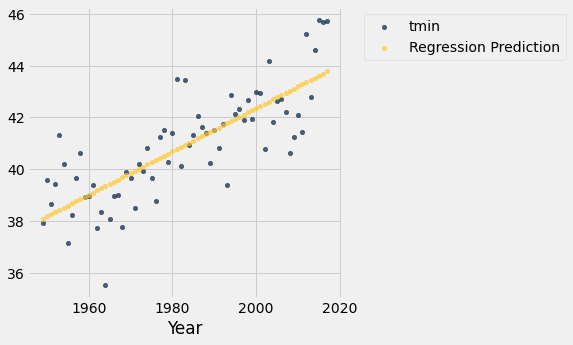

In [6]:
#Answer
regression_min = data.select('Year', 'tmin').with_column('Regression Prediction', m*data.column('Year') + b)
regression_min.scatter('Year')

***Question 9:*** According to the linear regression equation, by how much does the average minimum temperature increase every 10 years?

***Answer:*** 
    
    We have to multiply slope times 10 years - 0.8 degrees increase every 10 years

***Question 10:*** Explain why a slope of zero for the linear regression model would indicate according to the linear model that the average minimum temperature does not change per year.

**Answer:** 

    If slope would be zero in this case, it would mean that afer any amount of years, the average temperature amount would neither increase or decrease. 

***Question 11:*** Calculate a 95% confidence interval for the slope of the linear regression model. You may need to add additional lines of code to answer this question.

In [7]:
def bootstrap_slope(table, x, y, repetitions):
    
    # For each repetition:
    # Bootstrap the scatter, get the slope of the regression line,
    # augment the list of generated slopes
    
    ...#Complete the missing code here <------
    slopes = make_array()
    for i in np.arange(repetitions):
        bootstrap_sample = table.sample()
        bootstrap_slope = slope(bootstrap_sample, x, y)
        slopes = np.append(slopes, bootstrap_slope)
        
    # Find the endpoints of the 95% confidence interval for the true slope
    left = percentile(2.5, slopes)
    right = percentile(97.5, slopes)
    
    # Slope of the regression line from the original sample
    observed_slope = slope(table, x, y)
    
    # Display results
    Table().with_column('Bootstrap Slopes', slopes).hist(bins=20)
    plots.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=8);
    print('Slope of regression line:', observed_slope)
    print('Approximate 95%-confidence interval for the true slope:')
    print(left, right)

Slope of regression line: 0.08360824569017172
Approximate 95%-confidence interval for the true slope:
0.0659177050251646 0.10115485586695873


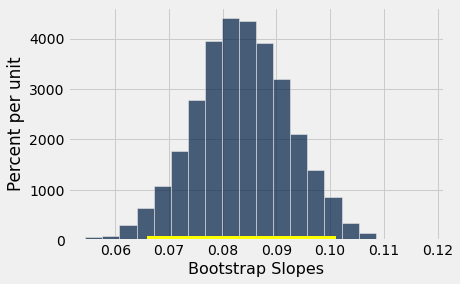

In [8]:
bootstrap_slope(data,'Year','tmin',5000)

***Question 11:*** Based on the 95% confidence interval for the slope of the regression equation do you think it is possible that the true slope of the regression equation is likely zero? What is the lower and larger value that the temperature is likely to increase every 10 years according to the boot strapped slope of the linear regression equation.

***Answer:*** 

    No, it is not likely to be zero. According to the boot strapped slope, the temperature is likely to increase from 0.06 to 0.1 degrees every year, and 0.6 to 1 degree every ten years.

***Question 12:*** Make a scatter plot of the residuals. You will need to complete the following functions below. 

Write a function that takes inputs of a table, slope, and intercept. The function will output the predicted value from the linear regression equation:
$$
\text{Predicted value} = mx+b
$$
where m is the slope of the linear regression equation, and b is the intercept.

In [9]:
def predicted(table, slope, intercept):
    predicted_value =  slope*table.column('Year')+intercept
    data_with_predictions = data.with_column(
        'predicted', predicted_value
    )
    return data_with_predictions
predicted(data,m,b)

Year,N,tmin,tmax,tavg,Date,decade,predicted
1949,365,37.937,62.3151,nan,1/1/1949,4,38.0915
1950,365,39.5918,63.6548,nan,1/1/1950,5,38.1751
1951,365,38.6356,62.0795,nan,1/1/1951,5,38.2587
1952,366,39.4262,62.6831,nan,1/1/1952,5,38.3424
1953,365,41.3096,65.1863,nan,1/1/1953,5,38.426
1954,365,40.2027,65.3205,nan,1/1/1954,5,38.5096
1955,365,37.1479,62.0027,nan,1/1/1955,5,38.5932
1956,366,38.2268,64.6858,nan,1/1/1956,5,38.6768
1957,365,39.6548,63.8027,nan,1/1/1957,5,38.7604
1958,365,40.6384,66.5973,nan,1/1/1958,5,38.844


Now calculate the residuals with the following formula, and make a scatter plot of the residuals.
$$
\text{residual} = \text{observed value of y} - \text{predicted value of y}
$$

In [10]:
data_with_predictions = predicted(data,m,b)
def residual(observed, predicted):
    residual = observed - predicted   
    return residual
residuals = residual(data_with_predictions.column('tmin'), data_with_predictions.column('predicted'))

Year,N,tmin,tmax,tavg,Date,decade,predicted,residual
1949,365,37.937,62.3151,nan,1/1/1949,4,38.0915,-0.154543
1950,365,39.5918,63.6548,nan,1/1/1950,5,38.1751,1.41664
1951,365,38.6356,62.0795,nan,1/1/1951,5,38.2587,0.376871
1952,366,39.4262,62.6831,nan,1/1/1952,5,38.3424,1.08388
1953,365,41.3096,65.1863,nan,1/1/1953,5,38.426,2.88363
1954,365,40.2027,65.3205,nan,1/1/1954,5,38.5096,1.69317
1955,365,37.1479,62.0027,nan,1/1/1955,5,38.5932,-1.44523
1956,366,38.2268,64.6858,nan,1/1/1956,5,38.6768,-0.450011
1957,365,39.6548,63.8027,nan,1/1/1957,5,38.7604,0.894399
1958,365,40.6384,66.5973,nan,1/1/1958,5,38.844,1.79435


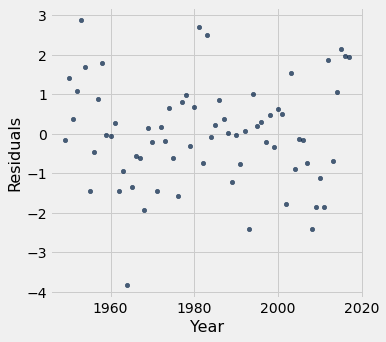

In [21]:
#Now make a scatter plot of the residuals
Table().with_columns('Year', data.column('Year'), 'Residuals', residuals).scatter('Year')
data_with_predictions.append_column('residual', residuals)

***Question 13:*** Based on the scatter plot of the residuals does the variance appear to be relatively constant. Carefully explain your answer, and determine if the assumption of constant variance for linear regression is reasonable.

***Answer:*** 

    Variance appears to be constant, as most of the residuals vary between -1 and 1, are equally distributed thorugh the years, and the graph appears to be ssymmetric along the 0 axis.

***Question 14:*** Make a histogram of the residuals. Do the residuals appear the be approximatley normally distributed? Is the assumption of normality in linear regression appear reasonable?

***Answer:***

    Yes, residuals appear to be normally distributed, as the histogram shows all residuals to be mostly or close to 0.  It seems like assumption of normality in linear regression is reasonable, as we got an expected result for residual distribution, variance is constant and graph is symmetric around 0

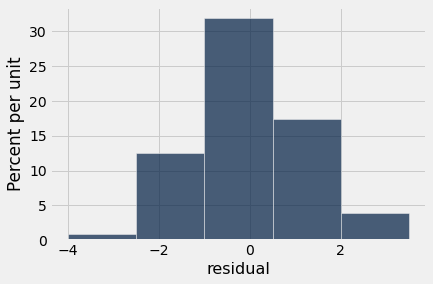

In [22]:
bins = np.arange(-4,4,1.5)
data_with_predictions.hist('residual', bins = bins)

***Question 15:*** Is the assumption of independence of observations for this data set valid? Explain your answer based on the nature of the data, and then with a conclusion of yes or no.

***Answer:*** 
    
    After analyzing our data, visualizing the linear regression and analyzing residuals, it appears that assumption of independence of observations is valid. The result of calculating residuals shows, that our prediction made has a constant, and close to zoro, amount of error in our prediction comparing to our actual data. We can conclude that our observations are independent, and that there is a linear positive relationship between the temperature and time - it is increasing over time.

**Question 16:** Make a scatter diagram of the average maximum temperatures with the regression line plotted on the same graph.

Correlation: 0.2805516416999281


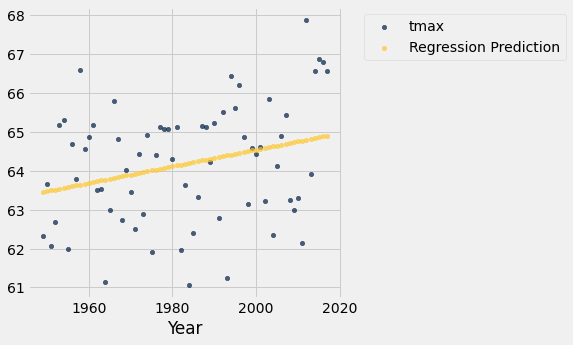

In [23]:
#Answer
print('Correlation:',correlation(data,'Year', 'tmax'))

m = slope(data,'Year','tmax')
b = intercept(data,'Year','tmax')

regression_max = data.select('Year', 'tmax').with_column('Regression Prediction', m*data.column('Year') + b)
regression_max.scatter('Year')

***Question 17:*** Calculate the linear regression equation between tmax and year. Year is the input variable and tmin is the response variable. 

In [24]:
#Answer
m = slope(data,'Year','tmax')
b = intercept(data,'Year','tmax')
print('Equation: tmax = m * Year * b    Tmax = ',m, '* Year +',b )

Equation: tmax = m * Year * b    Tmax =  0.02138662885860432 * Year + 21.773919361648495


***Question 18:*** Calculate a 95% confidence interval for the slope of the linear regression model. You may need to add additional lines of code to answer this question.

Slope of regression line: 0.02138662885860432
Approximate 95%-confidence interval for the true slope:
0.0023386672810790468 0.03912105235779452


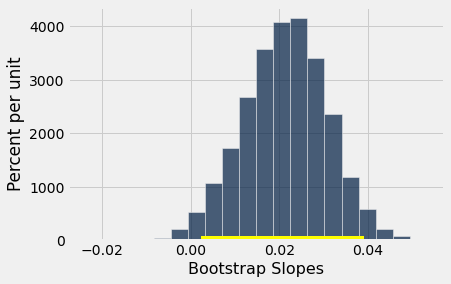

In [25]:
#Answer:
bootstrap_slope(data,'Year','tmax',5000)

***Question 19:*** By how much is the average maximum temperature expected to increase every ten years? According to the 95% confidence interval what is the lower estimate per ten years? According to the 95% confidence interval what is the upper estimate?

***Answer:*** 
    
    According to the linear regression equation, the average maximum temperature increases 0.02 degrees every year, therefore it increases 0.2 degrees every 10 years. According to the 95% confidence interval, lower estimate is 0.002 degrees, and the upper estimate is 0.03 degrees. It means that the maximum average temperature is expected to raise from 0.002 to 0.03 degrees every year.

***Question 20:*** Explain why the anlysis you performed indicates that nights average minimum temperature are warming faster than days average maximum temperature. Explain why average minimum temperature is a measure of night time temperature and average maximum temperature is a measure of day time temperature?

***Answer:*** 

    We can expect that the average minimum temperature would be observed during the night, and the maximum - during the day, as it is colder during the night, than during the day. According to our analysis, average nights minimum temperature is increasing at the rate of 0.06 degrees per year, which is faster than the increase in average maximum temperature during the day, which increases at the rate of 0.02 degrees a year.

***Question 21:*** Read this NYT article by John Schwartz titled, ["Scientists Predict Scorching Temperatures to
    Last Through Summer."](https://www.nytimes.com/2020/06/18/climate/summer-weather-prediction.html) According to the article nights are warming faster than days. What are two explations for this phenonemon? This article is also included in the assignment file with this jupyter notebook.
    



***Answers:***

1. First expanation, derived from more local observations, is a cloud cover. More heat could lead to higher vaporization, therefore more clouds. This new clouds would trap more heat underneath them, therefore the air would stay warm at night.

2. Another, more global explanation, involves the boundary layer, the lowest part of the atmosphere that is directly affected by the surface. As it is thinner during the night, the boundary layer at night warms more from the heat trapped by greenhouse gases.

***Question 22:*** Read this NYT article by John Schwartz titled, ["Scientists Predict Scorching Temperatures to
    Last Through Summer."](https://www.nytimes.com/2020/06/18/climate/summer-weather-prediction.html) According to the article cities are warming faster than suburbs. What are three possible causes for this?

***Answers:***

1. First of all, the lack of open space, and dencely packed territory. Those buildings and streets absorb more of the sun’s energy and radiate more heat than open spaces do.

2. Lack of nature. Trees and grass evapotranspirate, which cools the air significantly, while trees also make shade. 

3. The last reason, is the waste heat that results from transportation, industry, and energy-consuming equipment. Everything radiates heat, as well as greenhouse gases, that increases the air temperature. 


# Data analysis and exploration: comparing temperature over time.

***Question 23:*** Divide the data set into two data sets called pre and post 1980. As indicated separate the data as data before 1980 and data reported as 1980 and after. Report the median, and average minimum temperature for pre vs post 1980.

In [26]:
#Answer
pre = data.where('Year', are.below(1980))
post = data.where('Year', are.above(1979))

pre_median = percentile(50, pre.column('tmin'))
post_median = percentile(50, post.column('tmin'))

pre_average = np.average(pre.column('tmin'))
post_average = np.average(post.column('tmin'))


***Question 24:*** Make a histogram of the average minimum temperature of pre 1980 vs post overlaid on the same graph. 

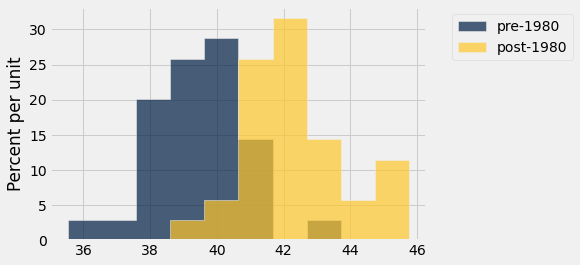

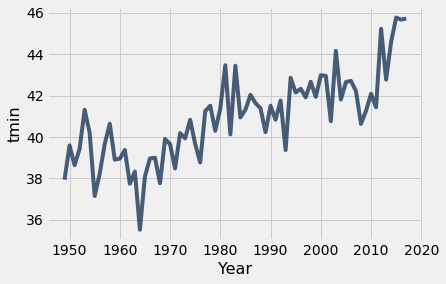

In [27]:
#Answer
Table().with_columns('pre-1980', data.where('Year', are.below(1983)).column('tmin'),
                 'post-1980', data.where('Year', are.above(1983)).column('tmin')).hist()

#Also added a line graph of nibimal temperatures over time
Table().with_columns('Year', data.column('Year'),
                    'tmin', data.column('tmin')).plot('Year', 'tmin')

***Question 25:*** Test the null hypothesis that the average minimum temperature pre 1980 is equal to the average minimum temperature of post 1980 against the alternative that average minimum temperature has increased post 1980. Use a permutation test to test this hypothesis at the 5% significance level. State the p-value and your decision. 

p-value:


0.0

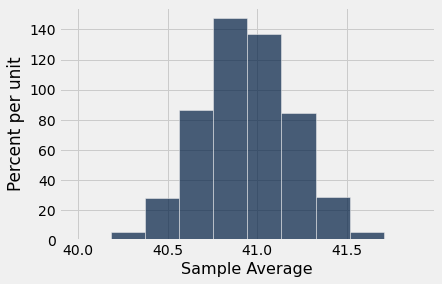

In [28]:
temperatures = data.select('tmin')
pre_average = np.average(pre.column('tmin'))

def random_sample_average():
    random_sample = temperatures.sample(34, with_replacement=False)
    return np.average(random_sample.column('tmin'))

sample_averages = make_array()
repetitions = 10000
for i in np.arange(repetitions):
    sample_averages = np.append(sample_averages, random_sample_average())
    
averages_tbl = Table().with_column('Sample Average', sample_averages)
averages_tbl.hist()

observed_statistic = pre_average
print('p-value:')
np.count_nonzero(sample_averages <= observed_statistic) / repetitions

Answer: 

    We reject the null hypothesis, because the probability of the average tenperature of pre-1980 data being that much lower than the average total is statistically insignificant. The random sampling of data have determined that the null hypothesis fails and that the average temperature in fact have increased since 1980.

***Question 26:*** Read the NYT article, ["It’s Not Your Imagination. Summers Are Getting Hotter"](https://www.nytimes.com/interactive/2017/07/28/climate/more-frequent-extreme-summer-heat.html) by NADJA POPOVICH and ADAM PEARCE. What does the changing histograms indicate about temperatures in the article? What does the histogram indicate about how the median, mean, and variance have changed over time in the article? Does ***your data for pre and post 1980 histrograms for SLC*** show similar trends? Write about 2 paragraphs to explain in detail your answers. This article is available in the CANVAS assignment with the NYT article, but it is better to access the article online to see the animated histograms.

***Answers:***

1. Changing histograms indicate how the data average temperature have changed in the Northern Hemisphere in the period of 2005-2015 comparing to 1994-2004 and 1950-1980. We can see, that the average temperature have dramatically increased towards higher temperatures.

2. Histograms show, how mean have changed more towards the hot area on a histogram - it is a very top of a graph. It demonstrates how mean have changed also, as the histogram extends towards the extremely hot zone, the middle of a graph moved from the normal zone to the hot zone. 
   
   Also, histograms demonstrate how variance have changed - over time, the histogram values are centered less around the median, and spread out more towards further from middle temperatures.
    
    
3. The data shows the same exact result comparing to my pre and post 1980 diagram for SLC - the average temperatures changed more towards higher temperatures. We can conclude, that climate change and increase in temperature since 1980 is global.

# Discussion and Conclusions

***Question 27:*** Read the NYT article: ["Nights Are Warming Faster Than Days. Here’s Why That’s Dangerous"](https://www.nytimes.com/interactive/2018/07/11/climate/summer-nights-warming-faster-than-days-dangerous.html) by KENDRA PIERRE-LOUIS and NADJA POPOVICH and answer the following questions. The article is also available in the CAVAS assignment with this python note book.

Questions:

1. Is the following true or false: according to the article nights are warming at nearly twice the rate of days?

2. According to the data set for SLC, and the analysis you performed, by how much faster is the average minimum temperature of SLC increasing compared to the average maximum temperature?

3. According to the NYT article is the following true or false: heat waves kill more Americans than any other natural disaster including floods, tornadoes and hurricanes?

4. According to the NYT article is the following true or false: heat waves affect older people, the sick, and young children more than others?

5. According to the NYT article is the following true or false: In cities like Los Angeles, Asian-American, black, and Hispanic residents are more likely to live in hotter parts of the city than white residents because of a complicated range of factors?

6. According to the NYT article is the following true or false: lack of green spaces in some neighborhoods, for example, can exacerbate the heat island effect, a phenomenon in which cities are as much as 22 degrees Fahrenheit warmer than less built-up environments because of of their impervious, heat-absorbing surfaces?




***Answers:***

    1. True, while speaking of summer nights
    
    2. Slope of 0.08 for the night, and 0.02 for the day. So, the average minimum temperature of SLC is increasing 4 times faster.
    
    3. True.
    
    4. Yes, they are especially at risk.
    
    5 Yes.
    
    6. True.

***Question 28:*** Explain how this assignment and data are related to the [UNESCO](https://en.unesco.org/sustainabledevelopmentgoals) sustainability goals. Take 2-3 paragraphs to argue and explain your reasoning, and cite your sources.

***Answers:***

    This assignment literally gives statistical and data evidence of global warming. It proves the effect of global warming on our own environment at SLC, and points out at causes, effects, dangers and potential solutions of global warming. It directly relates to the UNESCO sustainability goals, as UNESCO is one of the lead organisations taking action on climate change. 
    Another important thing from this assignment is education (Which is also one of the UNESCO sustainability goals). It is significantly impornat to bring awareness to the evidence of climate change, and this is what UNESCO is focused on.
    The purpose of the UNESCO climate change fight is to bring up the issue, spread awareness of it, and to use data science and statistics as a tool to spread awareness.
    
***Sources:***

https://en.unesco.org/sustainabledevelopmentgoals

https://en.unesco.org/themes/addressing-climate-change

***Question 29:*** Take 5-12 paragraphs to respond to the following questions, and cite your sources.
Questions: 

1. What social responsibility does climate change play for us as individuals and as a society? To what extent are these different?

2. What impact does climate change play on farming, and issues of income inequality?

3. How does this project relate to critical thinking that is open-minded, objective, and as free as possible from prejudice and presupposition. What role does statistics and data play in relation to this?

4. Explain how climate change is a multidisciplinary field that affects more than one form of the human experience.

5. What ethical and economic considerations are related to climate change? Illustrate at least one ethical issue related to climate change. Is it possible to achieve both an ethical and economically satisifactory outcome with regard to climate change? Explain your answer and cite your sources.

6. To what extent does climate change speak to the human condition both in which we share in common and also that differentiates us? 



***Sources:***

1. Based on the evidence, as indivicuals and a society, there is a responsibility to recognize, address, and take action against such global issue. As global warming affects all people on a planet, and especially future generations, we cannot allow ourselves to be selfish and to not take immidiate action to solve the issue.


2. It strongly hurts agriculture. Climate change can disrupt food availability, reduce access to food, and affect food quality. For example, projected increases in temperatures, changes in precipitation patterns, changes in extreme weather events, and reductions in water availability may all result in reduced agricultural productivity.
    
    Speaking of income inequality: something that previouse articles have mentioned, was an example of economic minorities in NYC, having to live in way hotter parts of a city comparing to more economically established population. Also, climate changes leads to the global ecomonic issues - per capita gross domestic product (GDP) has been reduced 17–31% at the poorest four deciles of the population-weighted country-level per capita GDP distribution, comparing to how it was before climate change. It follows that here is a very high likelihood that anthropogenic climate forcing has increased economic inequality between countries.
    
    
3. This question is something I briefly discussed in question 28. People need to realize the significance of the issue before it is too late, and it requires education. This assignment shows that statistics is a very good, simple, and undeniable way to prove and show the effects of global warming, even to people who are not by far experts at statistics like us, students. However, this is still a huge problem to bring a global awareness on climate change.


4. Climate change affects everybody and requires cooperation among many disciplines. It takes cooperation between scientists from almost every field of science, polititians, economists, businessmen, and literally everybody to reverse the global warming and take action. Statistics is definitely one of the field that is essential for this fight.


5. First of all, there is an ethical dilemma for many people, as well as contries - those who are not affected or affected little might not see the reason to take action against climate change. Especially, when it is not profitable - there are obvious economic and social reasons for the extended work of factoreis, transportation, construction and energy that is economically or socially impossible to give up, especially for hte developing industrial countries, that simply don't have the means and economic power to respond to the issue.

    
    Is it possible to achieve an ethical and economically satisifactory outcome? Yes, and the best example of it is the country Canada. Canada is a lead country in the battle against polution and climate change. Canade has proven that it is possible to make a profit off recicling, and economically grow while taking huge steps in addressing climate change.
    

6. Climate change is an issue like humanity have ever fased before. It requires cooperation between everybody, simply because it involves everyone in a society, and it's our responsibility as a society to respond to it. This is a condition we share in common, and the differences between us is what makes it so important to cooperate. Developing countries are one of the biggest issues and sources of climate chagne, and this is why they need support and guidance of developed countries to deal with it, not punishment for pollution. Another example is the economic minorities in NYC - in that case, they suffer global warming the most, therefore they need a lot of support and attention to deal with it. 

***Sources:***

https://19january2017snapshot.epa.gov/climate-impacts/climate-impacts-agriculture-and-food-supply_.html#:~:text=Climate%20change%20can%20disrupt%20food,result%20in%20reduced%20agricultural%20productivity.
https://www.nature.com/scitable/knowledge/library/ethics-and-global-climate-change-84226631/
https://www.canada.ca/en/services/environment/weather/climatechange.html
https://www.pnas.org/content/116/20/9808

***Question 30:*** Summarize your findings, and explain your conclusions in 4-6 paragraphs. What types of conclusions can be drawn from your data and analysis? What role does statistics and data play in answering these questions. What implications does this have for society, and what causes these temperature changes (cite your sources)?

***Conclusion:***

The data analysis and research performed in this assignment have taught me the part data science and statistics plays in recognizing, monitoring and resolving climate change. From the coding part of this assignment, we concluded that there are significant climate change effects in our own area. Also we concluded, that nights temperatures are growing dramatincally than the temperatures during the day. 

From the research part of this assignment, I learned how to analize the data we have worked with, and to also understand what it means. The statistical proof of climate change is impossible to deny, as the changes are noticable everywhere, and we saw it on an example of Salt Lake City and an entire Norther Hemisphere.

Climate change have very strong implications on everyday life, economics, society and, especially, humanity's future. This is an extremely diverse issue that my generation will have to deal with. Climate change already has tremendous effects on our planet, and, if not dealt with, will lead to irreversable consequences.

Even that dealing with climate change leads to the reasonable ethical issues, the trends proving global warming are undeniable. Global implications on health, economic dicline, environmental catastrophies and extinction of natural species - this a are all effects of climate change and global warming we already experience. To prefent further consequences, we have to cooperate as a society, and as a humanity. 


***Sources:***

https://19january2017snapshot.epa.gov/climate-impacts/climate-impacts-agriculture-and-food-supply_.html#:~:text=Climate%20change%20can%20disrupt%20food,result%20in%20reduced%20agricultural%20productivity.
https://www.nature.com/scitable/knowledge/library/ethics-and-global-climate-change-84226631/
https://www.canada.ca/en/services/environment/weather/climatechange.html
https://www.pnas.org/content/116/20/9808
https://en.unesco.org/sustainabledevelopmentgoals
https://en.unesco.org/themes/addressing-climate-change
https://www.canada.ca/en/environment-climate-change/services/climate-change/causes.html
https://www.nrdc.org/stories/global-climate-change-what-you-need-know